# IBM HR Employee Attrition

### ANN Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| ANN | 86.68% | 0.36 | 0.65 |

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Unnamed: 0                         1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   Attrition                          1470 non-null   int64
 3   BusinessTravel                     1470 non-null   int64
 4   DailyRate                          1470 non-null   int64
 5   DistanceFromHome                   1470 non-null   int64
 6   Education                          1470 non-null   int64
 7   EmployeeCount                      1470 non-null   int64
 8   EmployeeNumber                     1470 non-null   int64
 9   EnvironmentSatisfaction            1470 non-null   int64
 10  HourlyRate                         1470 non-null   int64
 11  JobInvolvement           

In [3]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
del df['Unnamed: 0']

In [5]:
df.shape

(1470, 51)

### Breaking Data into 70% Training and 30% Testing

In [6]:
start_time = time.time()

train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=52)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=52)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


In [7]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the train set
X_val = scaler.transform(x_val)

# Scale the test set
X_test = scaler.transform(x_test)

In [8]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(32,kernel_initializer='uniform', activation='relu', input_shape=(50,)))

model.add(Dense(8,kernel_initializer='uniform', activation='relu'))

# Add an output layer 
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
mod=model.fit(X_train, y_train,epochs=20, batch_size=32, verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
26/26 [==============================] - 1s 11ms/step - loss: 0.6858 - accuracy: 0.8378 - val_loss: 0.6758 - val_accuracy: 0.8297
Epoch 2/20
26/26 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.8378 - val_loss: 0.6230 - val_accuracy: 0.8297
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.8378 - val_loss: 0.5213 - val_accuracy: 0.8297
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8378 - val_loss: 0.4490 - val_accuracy: 0.8297
Epoch 5/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8378 - val_loss: 0.4325 - val_accuracy: 0.8297
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8378 - val_loss: 0.4300 - val_accuracy: 0.8297
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8378 - val_loss: 0.4294 - val_accuracy: 0.8297
Epoch 8/20
26/26 [=

In [10]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

12/12 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8668
[0.3741563856601715, 0.866847813129425]


In [11]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 1ms/step


In [12]:
y_pred[:5]

array([[0.00203944],
       [0.02360401],
       [0.1065928 ],
       [0.36745   ],
       [0.00157684]], dtype=float32)

In [13]:
y_p=list()
for i in y_pred:
    if i>0.5:
        y_p.append(1)
    else:
        y_p.append(0)

In [14]:
y_test[:5]

1182    0
302     0
1279    1
291     0
1217    0
Name: Attrition, dtype: int64

In [15]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_p)


array([[300,  12],
       [ 37,  19]], dtype=int64)

### End Evaluation Metrics

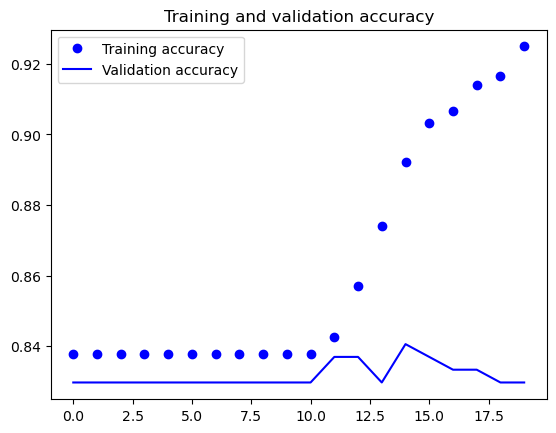

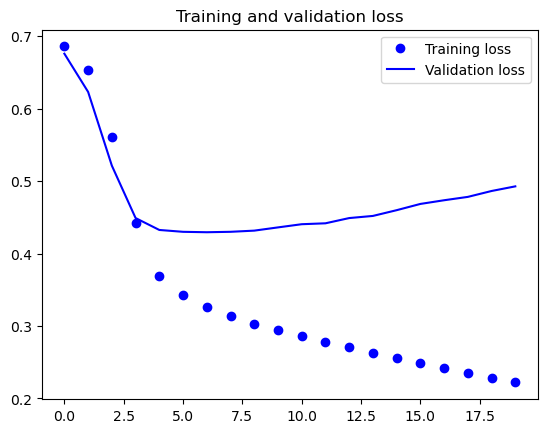

In [16]:
accuracy = mod.history['accuracy']
val_accuracy = mod.history['val_accuracy']
loss = mod.history['loss']
val_loss = mod.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [18]:
import numpy as np

# Ensure x_test is a NumPy array and has the correct data type
x_test = np.array(x_test, dtype=np.float32)

# Perform prediction
predicted_classes = model.predict(x_test)

# Process predictions to get class labels
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

# Compare predictions to true labels
correct = np.where(predicted_classes == y_test)[0]
print("Found %d correct labels" % len(correct))


12/12 [==============================] - 0s 2ms/step
Found 312 correct labels


In [19]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "Found %d correct labels" % len(correct))

12/12 [==============================] - 0s 1ms/step
Found 312 correct labels


In [20]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 56 incorrect labels


In [21]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      1.00      0.92       312
     Class 1       0.00      0.00      0.00        56

    accuracy                           0.85       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.72      0.85      0.78       368



ROC AUC: 0.65


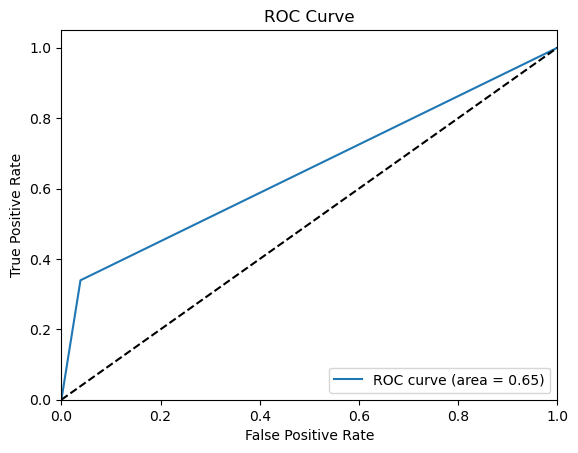

In [22]:
fpr, tpr, _ = roc_curve(y_test, y_p)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_p)

0.36827354260089684

In [24]:
# F1 score
f1_score(y_test,y_p)

0.43678160919540227